In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Social_Net_class.csv')

In [7]:
df.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


In [4]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [9]:
x.shape,y.shape

((400, 2), (400,))

In [5]:
import matplotlib.pyplot as plt

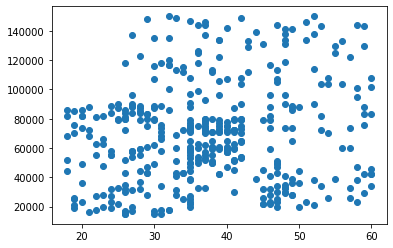

In [11]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [6]:
df_0 = df[df['Purchased'] == 0]
df_1 = df[df['Purchased'] == 1]

In [7]:
df_0.shape,df_1.shape

((257, 5), (143, 5))

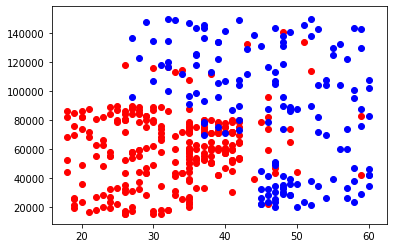

In [8]:
plt.scatter(df_0['Age'],df_0['EstimatedSalary'],c='red')
plt.scatter(df_1['Age'],df_1['EstimatedSalary'],c='blue')

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=56)          #randomstate (any unit value) ensures train data doesnt change on eacch execution
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_test_scaled.mean(axis=0)

array([-0.19219707, -0.19436914])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)

C:\Users\athar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.83

In [18]:
y_predict = model.predict(x_test_scaled)

In [37]:
y_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

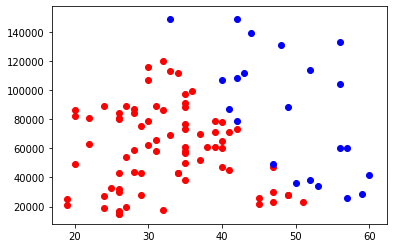

In [19]:
plt.scatter(x_test[y_predict==0]['Age'],x_test[y_predict==0]['EstimatedSalary'], c='red')
plt.scatter(x_test[y_predict==1]['Age'],x_test[y_predict==1]['EstimatedSalary'], c='blue')

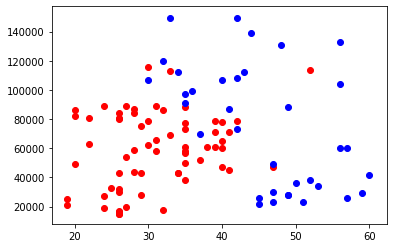

In [20]:
plt.scatter(x_test[y_test==0]['Age'],x_test[y_test==0]['EstimatedSalary'], c='red')
plt.scatter(x_test[y_test==1]['Age'],x_test[y_test==1]['EstimatedSalary'], c='blue')

In [21]:
model.predict(scaler.transform([[45,80000]]))

array([1], dtype=int64)

In [23]:
model.predict(scaler.transform([[45,80000]]))[0]

1

In [22]:
def get_result(Age,Salary):
    x = scaler.transform([[Age,Salary]])
    Purchased = model.predict(x)[0]
    if Purchased == 1:
        print('This customer is going to buy the item')
    else:
        print('This customer is not going to buy the item')
            

In [24]:
get_result(48,50000)

This customer is going to buy the item


In [32]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

In [26]:
confusion_matrix(y_test,y_predict)

array([[63,  2],
       [15, 20]], dtype=int64)

In [30]:
sum((y_test == y_predict) & (y_predict== 1))

20

In [31]:
sum((y_test == y_predict) & (y_predict== 0))

63

In [33]:
f1_score(y_test,y_predict)

0.7017543859649122

In [35]:
precision_score(y_test,y_predict)

0.9090909090909091

In [36]:
recall_score(y_test,y_predict)

0.5714285714285714

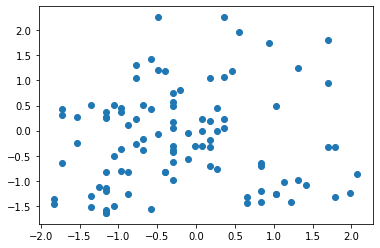

In [40]:
plt.scatter(x_test_scaled[:,0],x_test_scaled[:,1])      #as xtestscaled is a numpy array